# Malaria Dataset 
https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html
All diff dims but w 3 channels

In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_dir = 'cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [5]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [6]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'


In [7]:
os.listdir(train_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [8]:
uninfected_cell = train_path+'uninfected\\'+'C100P61ThinF_IMG_20150918_144104_cell_128.png'
imread(para_cell).shape

(148, 142, 3)

In [9]:
dim1 = []
dim2 = []

In [10]:
for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path + 'uninfected\\'+image_filename)
    d1,d2,colours = img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\timur\miniconda3\envs\learningtf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


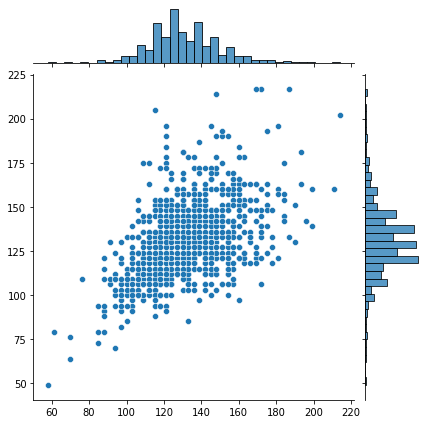

In [11]:
sns.jointplot(dim1,dim2)

In [12]:
np.mean(dim1)
np.mean(dim2)

130.75

In [13]:
image_shape=(130,130,3)

In [14]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest' ) #add rescale= 1/255 if images are not scaled up to 1

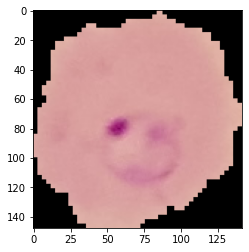

In [15]:
para_img = imread(para_cell)
plt.imshow(para_img)

In [16]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [17]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
early_stop = EarlyStopping(monitor="val_loss", patience = 2)

In [20]:
batch_size=16

In [21]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [22]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [23]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [24]:
from tensorflow.keras.models import load_model

In [38]:
##model.save('CNN_cells.h5')
model = load_model('CNN_cells.h5')

In [39]:
model.evaluate_generator(test_image_gen)

C:\Users\timur\AppData\Local\Temp/ipykernel_17996/4011314882.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[0.15856607258319855, 0.9480769038200378]

In [40]:
pred = model.predict_generator(test_image_gen) 

C:\Users\timur\AppData\Local\Temp/ipykernel_17996/1554598681.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [41]:
preds = pred > 0.5

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(test_image_gen.classes,preds))


              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.95      1300

    accuracy                           0.94      2600
   macro avg       0.95      0.94      0.94      2600
weighted avg       0.95      0.94      0.94      2600



In [31]:
print(confusion_matrix(test_image_gen.classes,preds))


[[1300    0]
 [1300    0]]
